# 1. Imports

In [4]:
# importing other dependencies
import numpy as np
import pandas as pd
# importing PyTorch
import torch
# importing torch.nn Module
import torch.nn as nn
# to load the activation functions
import torch.nn.functional as F
# importing Dataset, DataLoader
from torch.utils.data import Dataset, DataLoader, TensorDataset
# import Compose to compose transforms
from torchvision.transforms import Compose
# plotting
import matplotlib.pyplot as plt

In [3]:
# checks whether MPS is available
print(torch.backends.mps.is_available())

# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

# setting the device to "mps" instead of default "cpu"
device = torch.device("mps" if torch.backends.mps.is_available else "cpu")

True
True


# 2. Activation in NNs

In the process of building a neural network, one of the choices we make is what `Activation Function` to use in the hidden layer as well as at the output layer of the network.

The activation function decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

We can import the activation functions via-
- `torch.nn.activation_function`
- `torch.nn.functional.activation_function`
- `torch.activation_function`

# 3. Examples

We now take a look at a few activation functions

## 3.1 Sigmoid

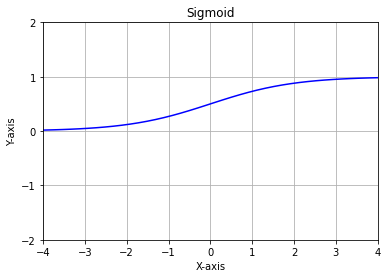

In [33]:
# define the activation
f = nn.Sigmoid()

# plot
x = np.linspace(-10,10,100)
x = torch.from_numpy(x.astype(np.float32))

plt.figure()

plt.plot(x, f(x), 'b')

plt.grid(True)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.title("Sigmoid")

plt.show()

## 3.2 Softmax

In [37]:
# define the activation
f = nn.Softmax(dim=1)

x = torch.tensor([[-10, 0, 10]], dtype=torch.float32)
print(x)
y = f(x)
print(y)

tensor([[-10.,   0.,  10.]])
tensor([[2.0611e-09, 4.5398e-05, 9.9995e-01]])


**NOTE:**

`nn.CrossEntropyLoss()` applies softmax first and takes class labels as the target class.

For Example:
```Python
criterion = nn.CrossEntropyLoss()
# suppose we are looking at MNIST Handwritten data
labels = [[1], [2], [0], [3]]
# these are outputs before applying softmax (softmax is applied by `nn.CrossEntropyLoss()`)
preds = [op1, op2, op3, op4]
# calculate the loss
loss = criterion(preds, labels)
```

## 3.3 ReLu

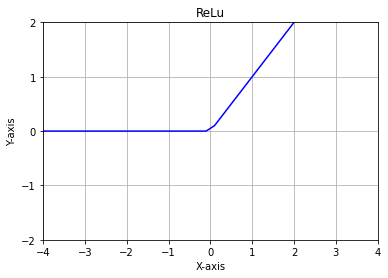

In [38]:
# define the activation
f = nn.ReLU()

# plot
x = np.linspace(-10,10,100)
x = torch.from_numpy(x.astype(np.float32))

plt.figure()

plt.plot(x, f(x), 'b')

plt.grid(True)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.title("ReLu")

plt.show()

## 3.4 Tanh

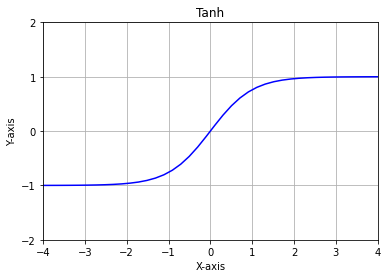

In [39]:
# define the activation
f = nn.Tanh()

# plot
x = np.linspace(-10,10,100)
x = torch.from_numpy(x.astype(np.float32))

plt.figure()

plt.plot(x, f(x), 'b')

plt.grid(True)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.title("Tanh")

plt.show()

## 3.5 L-ReLu

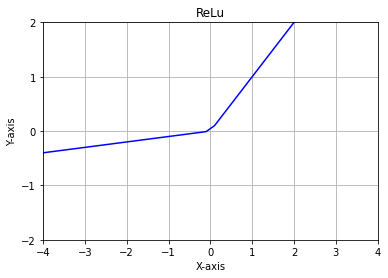

In [40]:
# define the activation
f = nn.LeakyReLU(negative_slope=0.1)

# plot
x = np.linspace(-10,10,100)
x = torch.from_numpy(x.astype(np.float32))

plt.figure()

plt.plot(x, f(x), 'b')

plt.grid(True)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.title("ReLu")

plt.show()

# 4. Defining multi-layered NNs

We define the layers of the Neural Network inside a custom wrapper class created on top of the `nn.Module` class. We can define these in 2 ways as described below.

As an example we will implement this on a fully connected Neural Network with single hidden layer.

## 4.1 Method 1

In this case we define both the linear layers and activation layers inside the `__init__` method of the model class instead of defining the activations in the `forward` method.

Since, we are going to define the activation layers inside the `__init__` method itself along with the other linear layers, we need to use `nn.activation_function()` as it created a `nn.Module` which makes sure that it is being added to the `nn.Sequential` model.

```Python
class NeuralNet(nn.Module):
    # input_size : # of features in an input, hidden_size: # nodes in hidden layer, num_classes: # of classes in the output (classification problem)
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        
        # store the important variables
        self.n_features = input_size
        self.n_classes = num_classes
        
        #define the linear and activation layers here
        
        # input layer
        # linear layer 1
        self.linear1 = nn.Linear(input_size, hidden_size)
        # activation layer 1
        self.act1 = nn.ReLU()
        
        # hidden layer
        # linear layer 2
        self.linear2 = nn.Linear(hidden_size, num_classes)
        # this is not required because nn.CrossEntropyLoss() already applies Softmax
        # activation layer 2
        # self.act2 = nn.Softmax(dim=1)
    
    def forward(self, X):
        # layer-1
        out = self.act1(self.linear1(X))
        # layer-2
        out = self.linear2(out)
        # out = self.act2(self.linear2(out))
        # no Softmax at the end
        return out


# model hyper-parameters
input_size = 28*28
hidden_size = 100
num_classes = 10

model = NeuralNet(
    input_size, hidden_size, num_classes
)

```

## 4.2 Method 2

In this case we define the linear layers inside the `__init__` method of the model class and define the activations in the `forward` method.

Since, we are going to define the activation layers inside the `forward` method, we need to use `torch.activation_function` or `nn.Functional.activation_function` functional API call.

```Python
class NeuralNet(nn.Module):
    # input_size : # of features in an input, hidden_size: # nodes in hidden layer, num_classes: # of classes in the output (classification problem)
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        
        # store the important variables
        self.n_features = input_size
        self.n_classes = num_classes
        
        #define the linear and activation layers here
        
        # input layer
        # linear layer 1
        self.linear1 = nn.Linear(input_size, hidden_size)
        
        # hidden layer
        # linear layer 2
        self.linear2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, X):
        # output layer 1
        out = torch.relu(self.linear1(X))
        # output layer 2
        # out = torch.softmax(self.linear2(out))
        out = self.linear2(out)
        # no softmax because `nn.CrossEntropyLoss()` already applies Softmax
        return out


# model hyper-parameters
input_size = 28*28
hidden_size = 100
num_classes = 10

model = NeuralNet(
    input_size, hidden_size, num_classes
)

```